#  Apple Inc. Stock Price Forecasting Using Python

Apple Inc. is an American multinational technology company headquartered in Cupertino, California, that designs, develops, and sells consumer electronics, computer software, and online services


Using Time Series Forecasting we are going to analyse Time Series components- Trend, Seasonality, Irregularity and Cyclic for Apple inc Stock prices from last April 2016 to Feb 2019 years.

#### The stock price data is taken from https://www.nasdaq.com/symbol/aapl/stock-chart, NASDAQ site.



At the opening bell of the stock market, investors around the world take notice of the opening price of the market and individual stocks. Where the stock closes for the day determines how well or poorly a stock performed, which is a big deal for not only investors but also financial institutions and other stakeholders.

### Understanding Stock Quotes

Before going into how closing stock prices work, it's important to go over the meaning of a stock's opening price, intraday high and low. If you've ever looked at a financial newspaper or visited a financial website such as Yahoo Finance and looked up a stock quote, you'll notice several prices listed for the same stock. The "open" is the starting price where the stock trades at the opening bell of the stock market.

The "high" is the highest at which the stock traded for the day and the "low" is the lowest price for the trading day. You'll also notice a "52-week range" for the stock. This is the highest and lowest stock prices for the stock over a one-year period.

The closing stock price is where the stock traded at the closing bell. For example, a stock quote for Apple Inc. shows a closing stock price of $ 174.18 on Feb. 5, 2019. The stock opened at $172.86 on that day.

### Why Closing Price is important 

The closing stock price is significant for several reasons. Investors, traders, financial institutions, regulators and other stakeholders use it as a reference point for determining performance over a specific time such as one year, a week and over a shorter time frame such as one minute or less. In fact, investors and other stakeholders base their decisions on closing stock prices. Institutional investors monitor a stock's closing price to make decisions regarding their investment portfolios.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data = pd.read_csv('applestocksapril16tofeb19.csv', index_col=['date'], parse_dates=['date'])

In [4]:
data.head()

,close,volume,open,high,low
date,,,,,
2019-02-28,173.15,27953810,174.32,174.91,172.9200
2019-02-27,174.87,27817640,173.21,175.00,172.7300
2019-02-26,174.33,16991610,173.71,175.30,173.1732
2019-02-25,174.23,21846400,174.16,175.87,173.9500
2019-02-22,172.97,18890250,171.58,173.00,171.3800


In [5]:
data.index

DatetimeIndex(['2019-02-28', '2019-02-27', '2019-02-26', '2019-02-25',
               '2019-02-22', '2019-02-21', '2019-02-20', '2019-02-19',
               '2019-02-15', '2019-02-14',
               ...
               '2016-04-14', '2016-04-13', '2016-12-04', '2016-11-04',
               '2016-08-04', '2016-07-04', '2016-06-04', '2016-05-04',
               '2016-04-04', '2016-01-04'],
              dtype='datetime64[ns]', name='date', length=733, freq=None)

indexing date has its uses, we can used this index to calculate measures like mean median for specific period of time 

In [6]:
print("The Avg Closed Stock price of year 2019 is", round(data['2019-01-01' : '2019-12-31'].close.mean(), 2))

The Avg Closed Stock price of year 2019 is 162.51


In [7]:
ts =  data['close']

In [8]:
type(ts)

pandas.core.series.Series

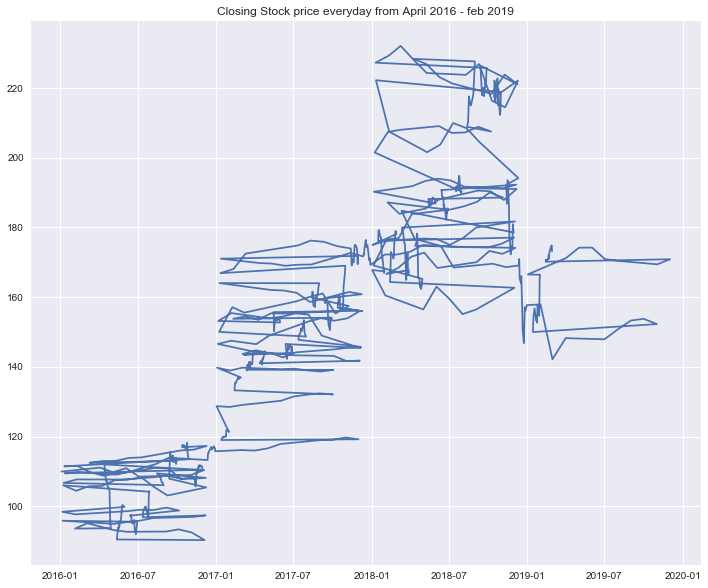

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.plot(ts)
plt.title('Closing Stock price everyday from April 2016 - feb 2019')
plt.grid(True)
plt.show()

#### Thats one nasty plot there 

[]

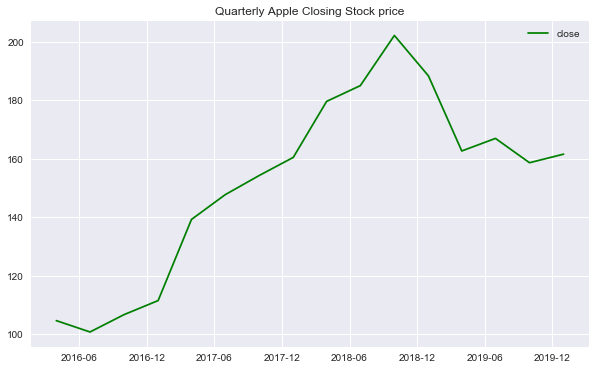

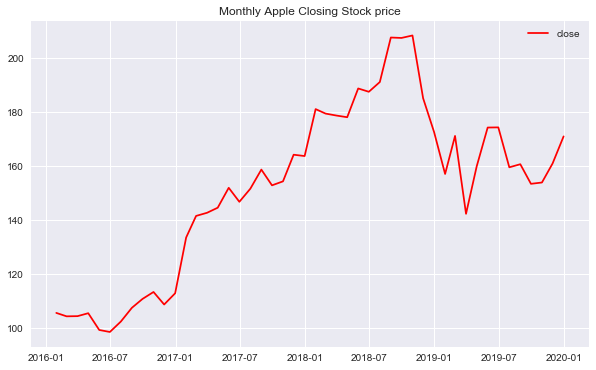

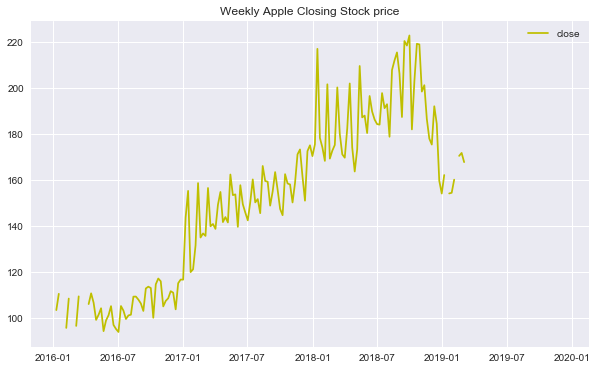

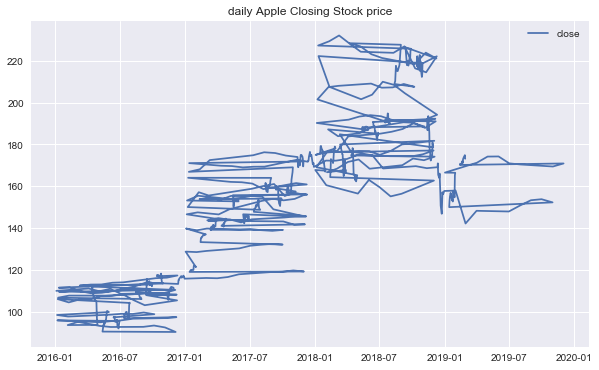

In [10]:
qt = data.close.resample('Q').mean()

plt.figure(figsize=(10, 6))
plt.plot(qt,color='g')
plt.title('Quarterly Apple Closing Stock price')
plt.legend()
plt.plot()

mt = data.close.resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(mt,color='r')
plt.title('Monthly Apple Closing Stock price')
plt.legend()
plt.plot()

wk = data.close.resample('W').mean()

plt.figure(figsize=(10, 6))
plt.plot(wk,color='y')
plt.title('Weekly Apple Closing Stock price')
plt.legend()
plt.plot()

plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('daily Apple Closing Stock price')
plt.legend()
plt.plot()

#### Its Tricky to work with daily data, so transfrom our data into Weekly closed price data using Pandas Resample method

In [11]:
tsw = data['close'].resample('W').mean()

In [12]:
tsw  = tsw.fillna(tsw.bfill())

In [13]:
tsw.head()

date
2016-01-10    103.424
2016-01-17    110.490
2016-01-24     95.680
2016-01-31     95.680
2016-02-07     95.680
Freq: W-SUN, Name: close, dtype: float64

In [14]:
#Droping nans 
tsw = tsw.dropna()

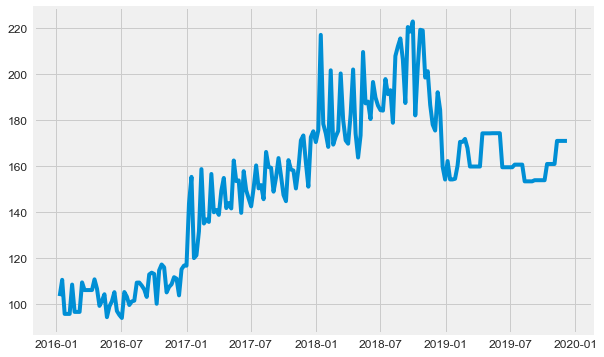

In [15]:
plt.figure(figsize=(10, 6))
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

plt.style.use('fivethirtyeight')
plt.plot(tsw)

we were able grasp the trend and seasonality of closed stock prices from the above plots.

### We need to make the time series stationary to apply Statistical Forecasting Methods

The series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean

constant variance

an autocovariance that does not depend on time.

#### Dickey-Fuller Test

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [16]:
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
rcParams['figure.figsize'] = 15, 6

import statsmodels.api as sm

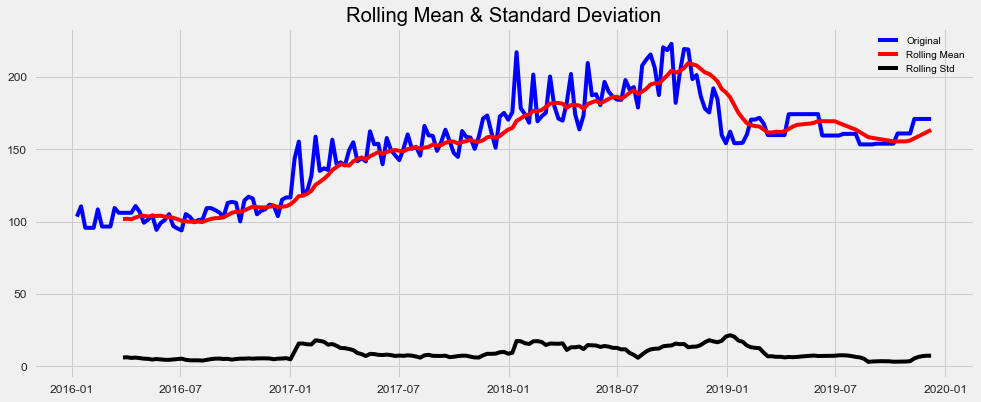

In [17]:
rolmean=tsw.rolling(12).mean()
rolstd = tsw.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(tsw, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=True)

In [18]:
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(tsw, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.636753
p-value                          0.463958
#Lags Used                       9.000000
Number of Observations Used    195.000000
Critical Value (1%)             -3.464337
Critical Value (5%)             -2.876479
Critical Value (10%)            -2.574733
dtype: float64




From The above plots clearly shows that both mean and standard deviation are changing. 
Even from Dickey-Fuller Test, p-value is 0.54 so we cannot reject the null hypothesis. the critical values are supposed to be more than T-statistic whcih is not the case.

In [19]:
def stationarity_test(timeseries):
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean=timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

In [20]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

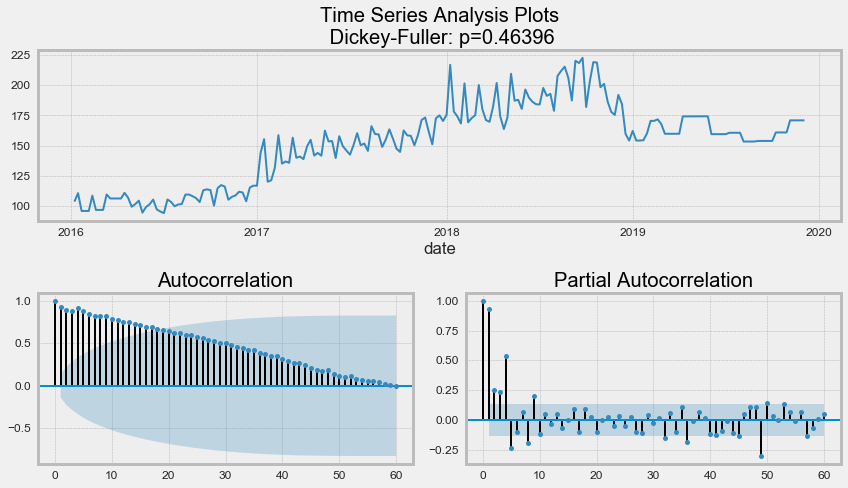

In [21]:
tsplot(tsw, lags=60)


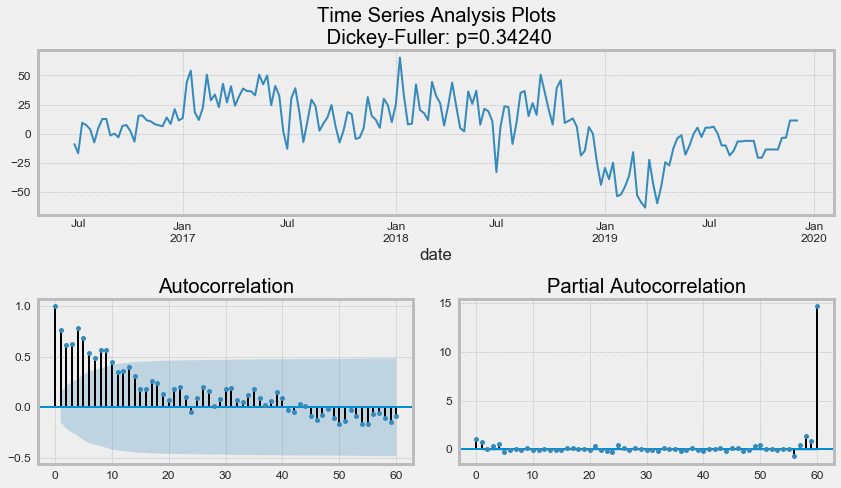

In [22]:
tsw_diff = tsw - tsw.shift(24)
tsplot(tsw_diff[24:], lags=60)

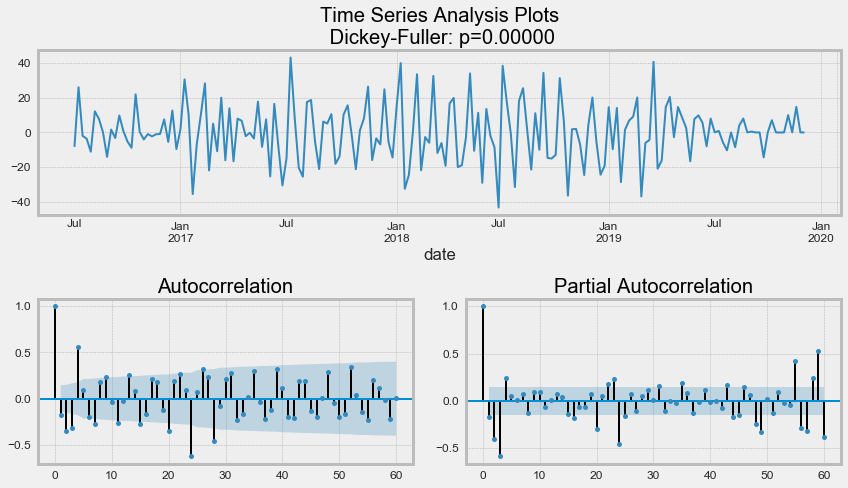

In [23]:
tsw_diff = tsw_diff - tsw_diff.shift(1)
tsplot(tsw_diff[24+1:], lags=60)

In [24]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)



36

In [25]:
# def optimizeSARIMA(parameters_list, d, D, s):
#     """
#         Return dataframe with parameters and corresponding AIC
        
#         parameters_list - list with (p, q, P, Q) tuples
#         d - integration order in ARIMA model
#         D - seasonal integration order 
#         s - length of season
#     """
    
#     results = []
#     best_aic = float("inf")

#     for param in tqdm_notebook(parameters_list):
#         # we need try-except because on some combinations model fails to converge
#         try:
#             model=sm.tsa.statespace.SARIMAX(tws, order=(param[0], d, param[1]), 
#                                             seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
#         except:
#             continue
#         aic = model.aic
#         # saving best model, AIC and parameters
#         if aic < best_aic:
#             best_model = model
#             best_aic = aic
#             best_param = param
#         results.append([param, model.aic])

#     result_table = pd.DataFrame(results)
#     result_table.columns = ['parameters', 'aic']
#     # sorting in ascending order, the lower AIC is - the better
#     #result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
#     return result_table

In [26]:
# %%time
# result_table = optimizeSARIMA(parameters_list, d, D, s)


In [30]:
#!pip install tqdm
parameters_list

[(2, 2, 0, 0),
 (2, 2, 0, 1),
 (2, 2, 1, 0),
 (2, 2, 1, 1),
 (2, 3, 0, 0),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (2, 3, 1, 1),
 (2, 4, 0, 0),
 (2, 4, 0, 1),
 (2, 4, 1, 0),
 (2, 4, 1, 1),
 (3, 2, 0, 0),
 (3, 2, 0, 1),
 (3, 2, 1, 0),
 (3, 2, 1, 1),
 (3, 3, 0, 0),
 (3, 3, 0, 1),
 (3, 3, 1, 0),
 (3, 3, 1, 1),
 (3, 4, 0, 0),
 (3, 4, 0, 1),
 (3, 4, 1, 0),
 (3, 4, 1, 1),
 (4, 2, 0, 0),
 (4, 2, 0, 1),
 (4, 2, 1, 0),
 (4, 2, 1, 1),
 (4, 3, 0, 0),
 (4, 3, 0, 1),
 (4, 3, 1, 0),
 (4, 3, 1, 1),
 (4, 4, 0, 0),
 (4, 4, 0, 1),
 (4, 4, 1, 0),
 (4, 4, 1, 1)]

In [33]:
#parameters_list
import itertools
p = q = range(2, 5)
d = range(2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))



warnings.filterwarnings("ignore") # specify to ignore warning messages



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (2, 0, 3) x (2, 0, 3, 12)
SARIMAX: (2, 0, 3) x (2, 0, 4, 12)


In [34]:
seasonal_pdq

[(2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 0, 4, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (2, 1, 4, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 0, 4, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12),
 (3, 1, 4, 12),
 (4, 0, 2, 12),
 (4, 0, 3, 12),
 (4, 0, 4, 12),
 (4, 1, 2, 12),
 (4, 1, 3, 12),
 (4, 1, 4, 12)]

In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tsw,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:1364.770551351843
ARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:1284.250408580568
ARIMA(2, 0, 2)x(2, 0, 4, 12)12 - AIC:1198.3823171450565
ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:1287.4707396019653
ARIMA(2, 0, 2)x(2, 1, 3, 12)12 - AIC:1203.8913855325582
ARIMA(2, 0, 2)x(2, 1, 4, 12)12 - AIC:1093.59907061941
ARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:1290.2270862949622
ARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:1285.5884433667277
ARIMA(2, 0, 2)x(3, 0, 4, 12)12 - AIC:1198.5197241059573
ARIMA(2, 0, 2)x(3, 1, 2, 12)12 - AIC:1204.173664672402
ARIMA(2, 0, 2)x(3, 1, 3, 12)12 - AIC:1194.82666273612
ARIMA(2, 0, 2)x(3, 1, 4, 12)12 - AIC:1090.9679057472658
ARIMA(2, 0, 2)x(4, 0, 2, 12)12 - AIC:1196.248240851281
ARIMA(2, 0, 2)x(4, 0, 3, 12)12 - AIC:1194.9685093542275
ARIMA(2, 0, 2)x(4, 0, 4, 12)12 - AIC:1185.2980888463853
ARIMA(2, 0, 2)x(4, 1, 2, 12)12 - AIC:1112.7508559784292
ARIMA(2, 0, 2)x(4, 1, 3, 12)12 - AIC:1102.5621821597226
ARIMA(2, 0, 2)x(4, 1, 4, 12)12 - AIC:1099.23799927947
AR

ARIMA(3, 0, 4)x(2, 1, 2, 12)12 - AIC:1225.7357634642594
ARIMA(3, 0, 4)x(2, 1, 3, 12)12 - AIC:1139.5046715417025
ARIMA(3, 0, 4)x(2, 1, 4, 12)12 - AIC:1054.345975592194
ARIMA(3, 0, 4)x(3, 0, 2, 12)12 - AIC:1236.4749099139262
ARIMA(3, 0, 4)x(3, 0, 3, 12)12 - AIC:1217.8522461261641
ARIMA(3, 0, 4)x(3, 0, 4, 12)12 - AIC:1124.3044382733533
ARIMA(3, 0, 4)x(3, 1, 2, 12)12 - AIC:1160.9214402407915
ARIMA(3, 0, 4)x(3, 1, 3, 12)12 - AIC:1137.8908871152937
ARIMA(3, 0, 4)x(3, 1, 4, 12)12 - AIC:1049.3690229649426
ARIMA(3, 0, 4)x(4, 0, 2, 12)12 - AIC:1146.4166129736486
ARIMA(3, 0, 4)x(4, 0, 3, 12)12 - AIC:1147.2898069751927
ARIMA(3, 0, 4)x(4, 0, 4, 12)12 - AIC:1126.1809231352704
ARIMA(3, 0, 4)x(4, 1, 2, 12)12 - AIC:1071.3486607451482
ARIMA(3, 0, 4)x(4, 1, 3, 12)12 - AIC:1062.609093403079
ARIMA(3, 0, 4)x(4, 1, 4, 12)12 - AIC:1055.9360523803487
ARIMA(3, 1, 2)x(2, 0, 2, 12)12 - AIC:1296.368428100129
ARIMA(3, 1, 2)x(2, 0, 3, 12)12 - AIC:1218.7625296307524
ARIMA(3, 1, 2)x(2, 0, 4, 12)12 - AIC:1135.552027239

ARIMA(4, 1, 3)x(3, 0, 2, 12)12 - AIC:1211.6722293152216
ARIMA(4, 1, 3)x(3, 0, 3, 12)12 - AIC:1219.7127583361912
ARIMA(4, 1, 3)x(3, 0, 4, 12)12 - AIC:1135.3853301752224
ARIMA(4, 1, 3)x(3, 1, 2, 12)12 - AIC:1197.2659483833909
ARIMA(4, 1, 3)x(3, 1, 3, 12)12 - AIC:1222.679083318833
ARIMA(4, 1, 3)x(3, 1, 4, 12)12 - AIC:4608.855539723643
ARIMA(4, 1, 3)x(4, 0, 2, 12)12 - AIC:1260.3856089778658
ARIMA(4, 1, 3)x(4, 0, 3, 12)12 - AIC:1249.2849256462137
ARIMA(4, 1, 3)x(4, 0, 4, 12)12 - AIC:1205.1495638920276
ARIMA(4, 1, 3)x(4, 1, 2, 12)12 - AIC:1134.062727938504
ARIMA(4, 1, 3)x(4, 1, 3, 12)12 - AIC:1116.5404689683337
ARIMA(4, 1, 3)x(4, 1, 4, 12)12 - AIC:6626.9122546650115
ARIMA(4, 1, 4)x(2, 0, 2, 12)12 - AIC:1282.2734942613783
ARIMA(4, 1, 4)x(2, 0, 3, 12)12 - AIC:1204.8135651244822
ARIMA(4, 1, 4)x(2, 0, 4, 12)12 - AIC:1105.591905771721
ARIMA(4, 1, 4)x(2, 1, 2, 12)12 - AIC:1213.2975396543943
ARIMA(4, 1, 4)x(2, 1, 3, 12)12 - AIC:1120.545947979532
ARIMA(4, 1, 4)x(2, 1, 4, 12)12 - AIC:5609.66630735073

In [37]:
#ARIMA(4, 1, 4)x(4, 1, 3, 12)12 - AIC:1046.5638662313872
mod = sm.tsa.statespace.SARIMAX(tsw,
                                order=(4, 1, 4),
                                seasonal_order=(4, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

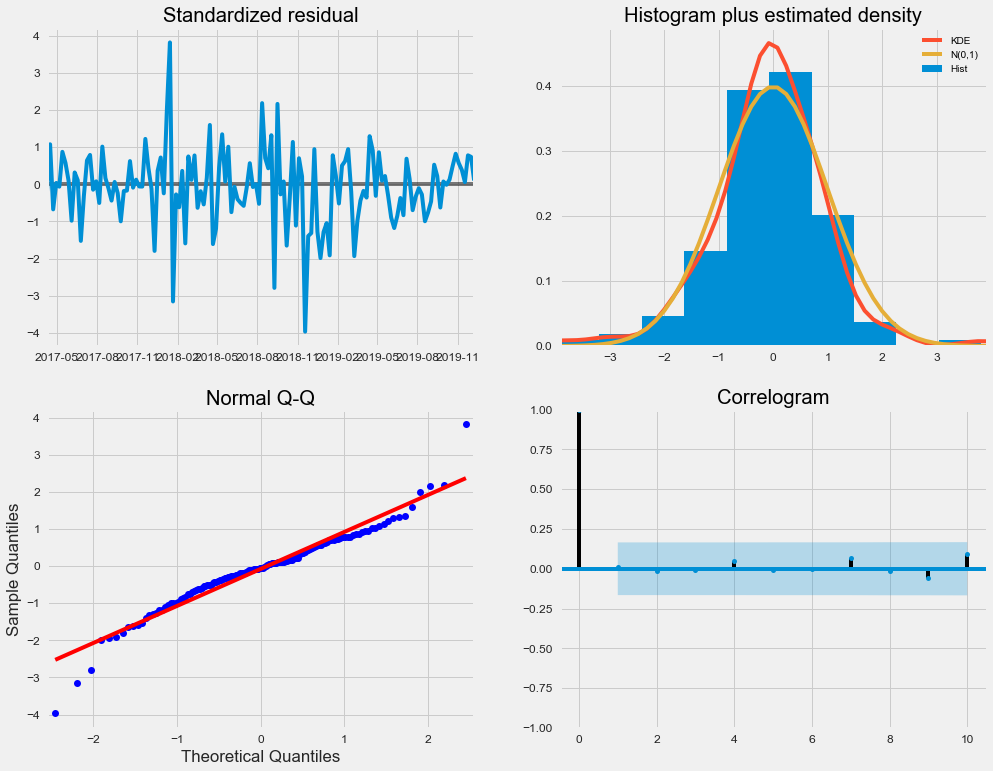

In [39]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

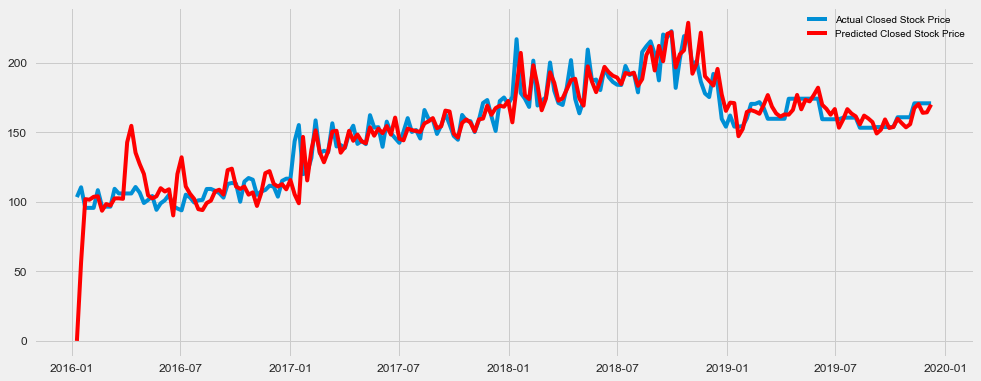

In [47]:
plt.plot(tsw, label= 'Actual Closed Stock Price')
plt.plot(results.fittedvalues, color='r', label= 'Predicted Closed Stock Price')
#plt.title('RSS: %.4f'% sum((results.fittedvalues-tsw)**2))
plt.legend()

In [48]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);


In [62]:
df = data.copy()

# df = df['close'].resample('W').mean()
# df.head()

wk.head()

date
2016-01-10    103.424
2016-01-17    110.490
2016-01-24        NaN
2016-01-31        NaN
2016-02-07     95.680
Freq: W-SUN, Name: close, dtype: float64

In [112]:
data1['Arima_Forecasted_Values'] = results.fittedvalues

In [111]:
data1 = pd.DataFrame(tsw)

In [119]:
data1.tail(10)

,close,Arima_Forecasted_Values
date,,
2019-10-06,153.80,NaN
2019-10-13,160.86,NaN
2019-10-20,160.86,NaN
2019-10-27,160.86,NaN
2019-11-03,160.86,NaN
2019-11-10,170.89,NaN
2019-11-17,170.89,NaN
2019-11-24,170.89,NaN
2019-12-01,170.89,NaN


In [80]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

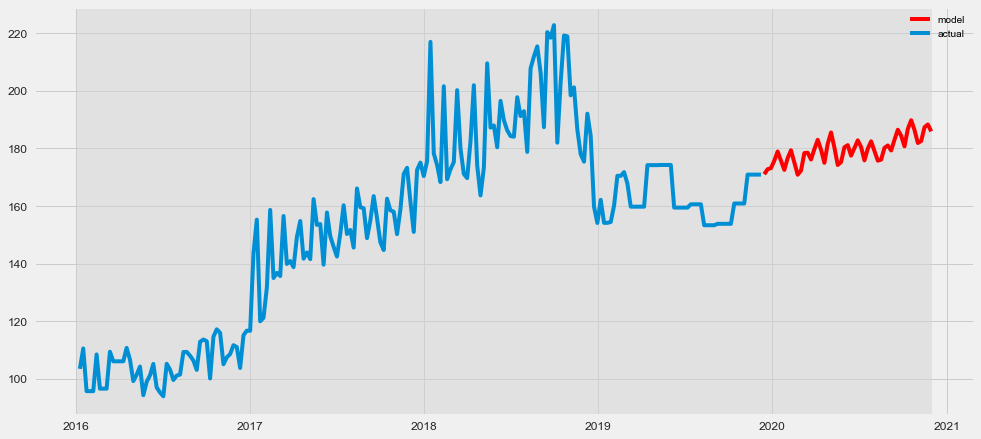

In [115]:
data1['Arima_Forecasted_Values']= np.NaN
    
    # forecasting on n_steps forward 
forecast = results.predict(start = data1.shape[0], end = data1.shape[0]+50)
forecast = data1.Arima_Forecasted_Values.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
#error = mean_absolute_percentage_error(data1['close'], data1['Arima_Forecasted_Values'])

plt.figure(figsize=(15, 7))
#plt.title("Mean Absolute Percentage Error:", error)
plt.plot(forecast, color='r', label="model")
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(tsw, label="actual")
plt.legend()
plt.grid(True);

In [116]:
    # calculate error, again having shifted on s+d steps from the beginning
error = mean_absolute_percentage_error(data1['close'], data1['Arima_Forecasted_Values'])

In [118]:
error

nan

In [106]:
data1

,close,Arima_Forecasted_Values
date,,
2016-01-10,103.424000,0.000000
2016-01-17,110.490000,56.729426
2016-01-24,95.680000,101.950070
2016-01-31,95.680000,101.565248
2016-02-07,95.680000,103.634714
2016-02-14,108.425000,104.004636
2016-02-21,96.550000,93.632378
2016-02-28,96.550000,98.439831
2016-03-06,96.550000,97.364827


In [121]:
data.head()

,close,volume,open,high,low
date,,,,,
2019-02-28,173.15,27953810,174.32,174.91,172.9200
2019-02-27,174.87,27817640,173.21,175.00,172.7300
2019-02-26,174.33,16991610,173.71,175.30,173.1732
2019-02-25,174.23,21846400,174.16,175.87,173.9500
2019-02-22,172.97,18890250,171.58,173.00,171.3800


In [129]:
data1["2019-02-01" :"2019-02-28"]

,close,Arima_Forecasted_Values
date,,
2019-02-03,160.118000,NaN
2019-02-10,170.466667,NaN
2019-02-17,170.466667,NaN
2019-02-24,171.747500,NaN


In [130]:
data1["2019-03-01" :"2019-03-31"]

,close,Arima_Forecasted_Values
date,,
2019-03-03,167.754,NaN
2019-03-10,159.755,NaN
2019-03-17,159.755,NaN
2019-03-24,159.755,NaN
2019-03-31,159.755,NaN


In [131]:
#building the model
from pyramid.arima import auto_arima
model = auto_arima(np.log10(data1['close']), trace=True, error_action='ignore', suppress_warnings=True)
model.fit(np.log10(data['Tractor-Sales']))

ModuleNotFoundError: No module named 'pyramid'

In [132]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

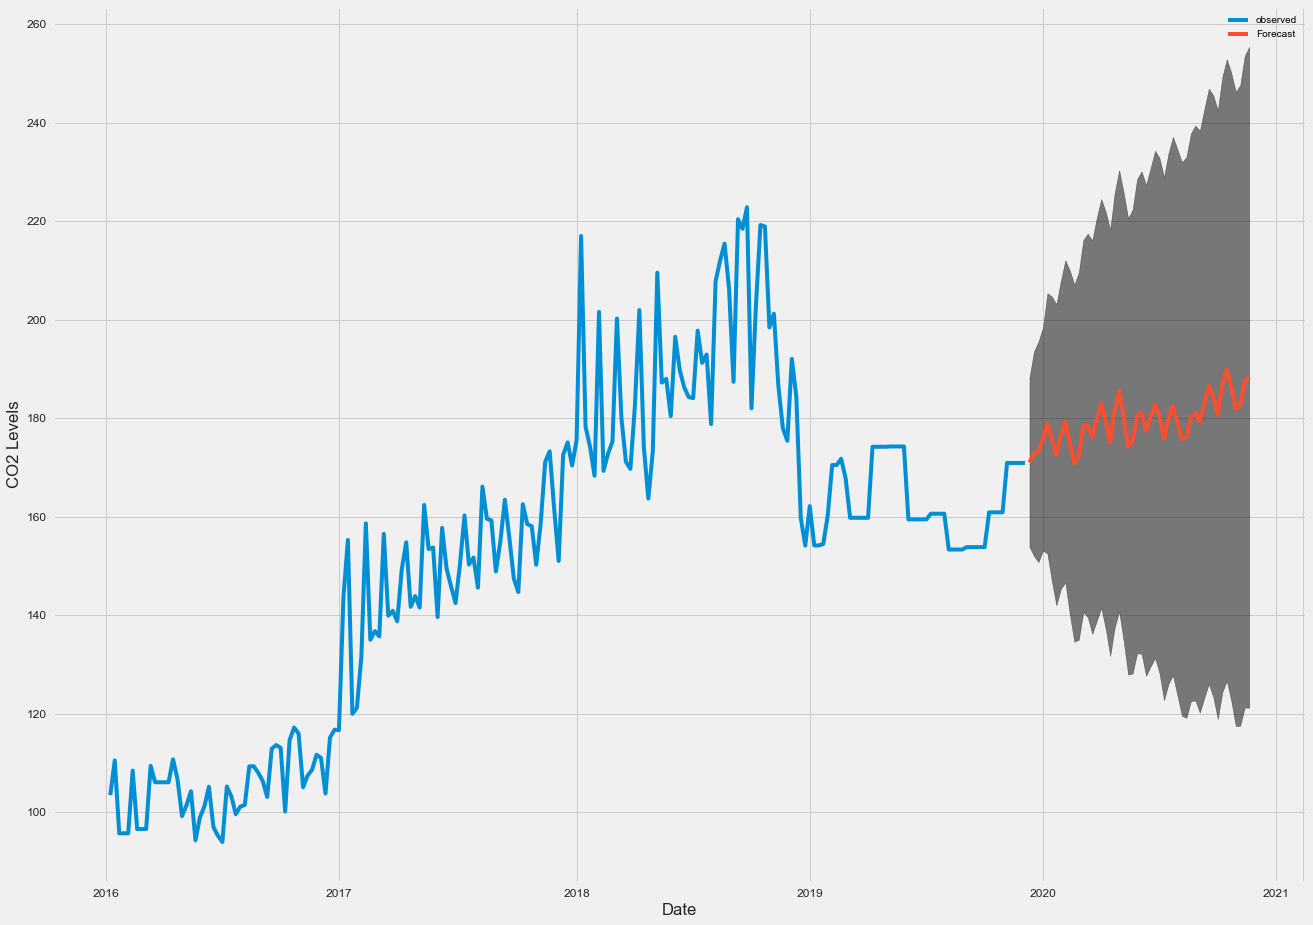

In [134]:
ax = tsw.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()